## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.


In this homework, we will use the Car price dataset like last week. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv).

Or you can do it with `wget`:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
```

In [54]:
!wget "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"

--2023-10-07 13:19:11--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv


Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.1’

data.csv.1          100%[===================>]   1.41M   666KB/s    in 2.2s    

2023-10-07 13:19:15 (666 KB/s) - ‘data.csv.1’ saved [1475504/1475504]




We'll work with the `MSRP` variable, and we'll transform it to a classification task. 

For the rest of the homework, you'll need to use only these columns:

* `Make`,
* `Model`,
* `Year`,
* `Engine HP`,
* `Engine Cylinders`,
* `Transmission Type`,
* `Vehicle Style`,
* `highway MPG`,
* `city mpg`
* `MSRP`

### Data preparation

* Keep only the columns above
* Lowercase the column names and replace spaces with underscores
* Fill the missing values with 0 
* Make the price binary (1 if above the average, 0 otherwise) - this will be our target variable `above_average`

Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [114]:
raw_df = pd.read_csv("data.csv")
raw_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [137]:
working_cols = [
    "Make",
    "Model",
    "Year",
    "Engine HP",
    "Engine Cylinders",
    "Transmission Type",
    "Vehicle Style",
    "highway MPG",
    "city mpg", 
    "MSRP",
]
df = raw_df[working_cols]
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [138]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
categorical = list(df.select_dtypes("object").columns)
numerical = list(df.select_dtypes("number").columns)[:-1] # drop msrp
categorical, numerical

(['make', 'model', 'transmission_type', 'vehicle_style'],
 ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg'])

In [139]:
df.loc[:,categorical] = df.copy()[categorical].apply(lambda row: row.str.lower().str.replace(" ", "_"))
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500


In [140]:
df.isna().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [141]:
df = df.fillna(0)
df.isna().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [144]:
print(df.msrp.mean().round(0))
df["above_average"] = (df.msrp > df.msrp.mean()).astype(int)
df.head()

40595.0


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135,1
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650,1
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350,0
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450,0
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500,0


In [145]:
df_clean = df.drop("msrp", axis=1)

In [188]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df_clean, test_size=.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=.2/.8, random_state=1)

# Reset index and get y vectors
target = "above_average"

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values
        
del df_train[target] 
del df_val[target] 
del df_test[target]

In [147]:
df_train.shape, df_val.shape, df_test.shape

((7148, 9), (2383, 9), (2383, 9))



### Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score and compute AUC with the `above_average` variable
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['engine_hp']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.


In [148]:
df_train[numerical]

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg
0,2016,280.0,6.0,28,27
1,2014,300.0,6.0,30,18
2,2016,259.0,4.0,27,19
3,2015,280.0,6.0,25,17
4,2016,283.0,6.0,25,17
...,...,...,...,...,...
7143,2015,148.0,4.0,33,24
7144,2016,325.0,6.0,24,17
7145,2017,130.0,4.0,37,32
7146,1991,162.0,5.0,20,16


In [149]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score

In [150]:
df_q1 = df_train[numerical]
df_q1.head()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg
0,2016,280.0,6.0,28,27
1,2014,300.0,6.0,30,18
2,2016,259.0,4.0,27,19
3,2015,280.0,6.0,25,17
4,2016,283.0,6.0,25,17


In [151]:
scaler = MinMaxScaler((0, 1))
X_q1 = scaler.fit_transform(df_q1)
y_pred = X_q1[:, 0]
# y_pred
roc_auc_score(y_train, y_pred)

0.687551492804683

In [152]:
scores = []
for col in range(X_q1.shape[1]):
    y_pred = X_q1[:,col]
    score = roc_auc_score(y_train, y_pred)
    if score < 0.5:
        score = roc_auc_score(y_train, -y_pred)
        col = -col
    scores.append((col, score))
scores

[(0, 0.687551492804683),
 (1, 0.9171031265539011),
 (2, 0.766116490165669),
 (-3, 0.6330587871772013),
 (-4, 0.6734244643245233)]

In [97]:
scaler.get_feature_names_out()[1]

'engine_hp'


Which numerical variable (among the following 4) has the highest AUC?

>- **`engine_hp`**
- `engine_cylinders`
- `highway_mpg`
- `city_mpg`



### Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```


In [153]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [206]:
def train(df_train, y_train, C=1.0):

    train_dicts = df_train[categorical + numerical].to_dict(orient="records")
    
    dv = DictVectorizer()
    X_train = dv.fit_transform(train_dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

In [209]:
def predict(df, dv, model):

    df_dicts = df[categorical + numerical].to_dict(orient="records")
    
    X = dv.transform(df_dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred


In [213]:
dv, model = train(df_train, y_train)
y_pred = predict(df_val, dv, model)
print("ROC AUC = %.3f" % roc_auc_score(y_val, y_pred))


ROC AUC = 0.977


In [214]:
from sklearn.metrics import roc_curve

def plot_roc_curve(y_val, y_pred):
    fpr, tpr, thresholds = roc_curve(y_val, y_pred)
    plt.figure(figsize=(6,6))

    plt.plot(fpr, tpr, label="model")
    plt.plot([0,1],[0,1], label="rand", linestyle="--")
    # plt.plot(df_ideal.fpr, df_ideal.tpr, label="ideal")

    plt.xlabel("FPR")
    plt.ylabel("TPR")

    plt.legend()

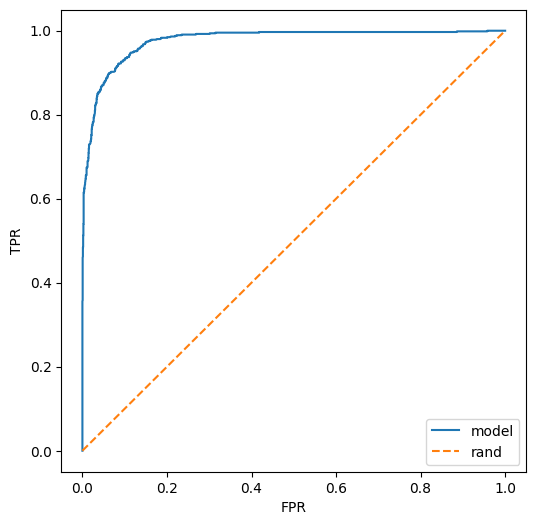

In [215]:
plot_roc_curve(y_val, y_pred)


What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.678
- 0.779
- 0.878
>- **0.979**




### Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them


In [216]:
y_val

array([1, 0, 0, ..., 0, 1, 0])

In [245]:
def calc_pr(y_val, y_pred, t=0.5):

    act_pos = y_val == 1
    act_neg = y_val == 0
    pred_pos = y_pred >= t
    pred_neg = y_pred < t

    tp = (pred_pos & act_pos).sum()
    tn = (pred_neg & act_neg).sum()
    fp = (pred_pos & act_neg).sum()
    fn = (pred_neg & act_pos).sum()

    p = tp / (tp + fp)
    r = tp / (tp + fn)

    return p, r

In [ ]:
dv, model = train(df_train, y_train)
y_pred = predict(df_val, dv, model)

scores = []

for t in np.linspace(0, 1, 101):
    p, r = calc_pr(y_val, y_pred, t=t)
    scores.append((t, p, r))

df_ = pd.DataFrame(scores, columns=["t", "p", "r"])
df_.head()

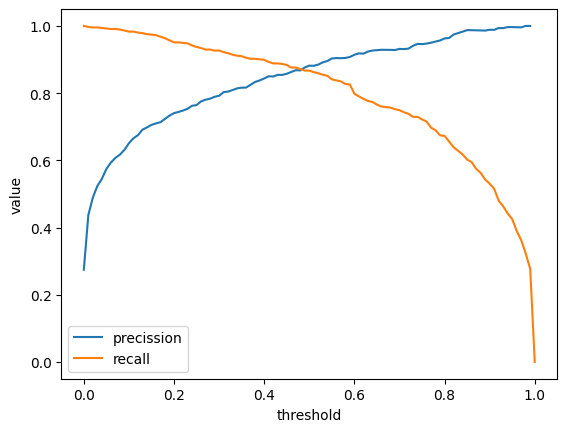

In [252]:
plt.plot(df_.t, df_.p, label="precission")
plt.plot(df_.t, df_.r, label="recall")
plt.xlabel("threshold")
plt.ylabel("value")
plt.legend()


At which threshold precision and recall curves intersect?

* 0.28
>* **0.48**
* 0.68
* 0.88




### Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01


In [262]:
dv, model = train(df_train, y_train)
y_pred = predict(df_val, dv, model)

f1_scores = []

for t in np.linspace(0, 1, 101):
    p, r = calc_pr(y_val, y_pred, t=t)
    f1 = 2 * p * r / (p + r)
    f1_scores.append((t, f1))

df_ = pd.DataFrame(f1_scores, columns=["t", "f1"])


/tmp/ipykernel_5802/2734796536.py:13: RuntimeWarning: invalid value encountered in scalar divide
  p = tp / (tp + fp)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


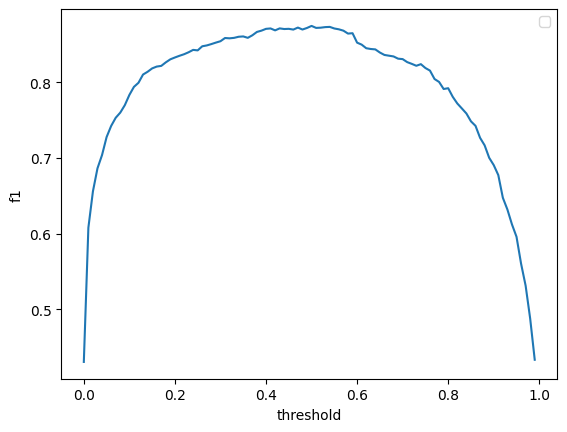

In [264]:
plt.plot(df_.t, df_.f1)
plt.xlabel("threshold")
plt.ylabel("f1")
plt.legend()

In [266]:
df_[df_.f1.eq(df_.f1.max())]

,t,f1
50,0.5,0.874325


In [267]:
df_.iloc[47:53,:]

,t,f1
47,0.47,0.872146
48,0.48,0.869565
49,0.49,0.871637
50,0.50,0.874325
51,0.51,0.871716
52,0.52,0.871994



At which threshold F1 is maximal?

- 0.12
- 0.32
>- **0.52**
- 0.72




### Question 5: 5-Fold CV


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation



How large is standard devidation of the scores across different folds?

- 0.003
- 0.030
- 0.090
- 0.140




### Question 6: Hyperparemeter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.01, 0.1, 0.5, 10]`
* Initialize `KFold` with the same parameters as previously
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)



Which `C` leads to the best mean score?

- 0.01
- 0.1
- 0.5
- 10


If you have ties, select the score with the lowest std. If you still have ties, select the smallest `C`.




## Submit the results

- Submit your results here: https://forms.gle/E7Fa3WuBw3HkPQYg6
- If your answer doesn't match options exactly, select the closest one.
- You can submit your solution multiple times. In this case, only the last submission will be used

## Deadline

The deadline for submitting is October 9 (Monday), 23:00 CET. After that the form will be closed.
